# Verification recopiage manip Celine Gabillet

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import copy
import os, sys
from string import Template
import time
from IPython.display import display

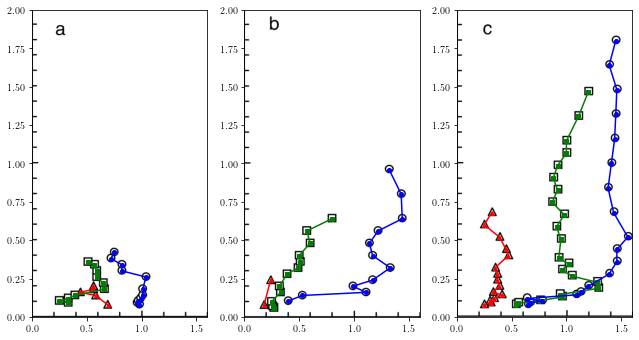

In [7]:
img_a = plt.imread("diameter_section_a.png")
img_b = plt.imread("diameter_section_b.png")
img_c = plt.imread("diameter_section_c.png")
imgs  = [img_a, img_b, img_c]

fig = plt.figure(figsize = (9,4.8))

tab_diams = [ [0 for i in range(3)] for i in range(4)] # tab_diams[debit air][position]
noms_debit= [0, 2, 5, 10]
noms_positions=['a', 'b', 'c']
labels_debit = ["-", "-^r", "-sg", "-ob"]

for deb in range(1, 4):
    for pos in range(3):
        tab_diams[deb][pos] = pd.read_csv(f"{noms_debit[deb]}{noms_positions[pos]}_B.txt", sep = '\t')

for pos in range(3):
    plt.subplot( int( f'13{1+pos}') )
    for deb in range(1, 4):
        plt.imshow(imgs[pos], extent=[0, 1.6, 0, 2], aspect=1.4)

        plt.plot(1000*np.array(tab_diams[deb][pos]['DB']), tab_diams[deb][pos]['y/h'], labels_debit[deb], markersize = 4)

plt.tight_layout()

## Liquid-phase turbulence

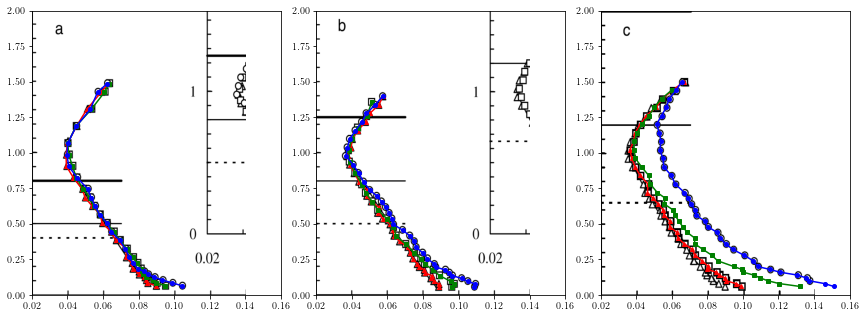

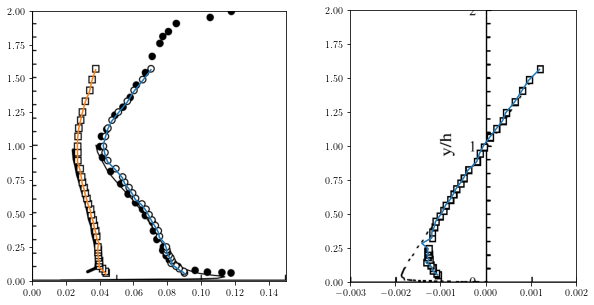

In [25]:
img_mono = plt.imread("turb_fluct_mono.png")
img_mono2= plt.imread("uv_fluct_mono.png")

imgs= [plt.imread("turb_fluct_section_a.png") ,plt.imread("turb_fluct_section_b.png") , plt.imread("turb_fluct_section_c.png") ]

fig = plt.figure(figsize = (12,8))

tab_L_simple = [ [0 for i in range(3)] for i in range(4)] # tab_L_simple[debit air][position]
tab_L_double = [ 0 for i in range(4)] # only in position c

for deb in range(0, 4) :
    for pos in range(3):
        tab_L_simple[deb][pos] = pd.read_csv(f"{noms_debit[deb]}{noms_positions[pos]}_L.txt", sep = '\t')
        tab_L_simple[deb][pos].columns = ['y/h', 'UL/Ulmax', 'uL/ULmax', 'UL', 'uL']

for deb in range(4):
    if deb !=1 :
        tab_L_double[deb] = pd.read_csv(f"{noms_debit[deb]}{noms_positions[2]}_L_sonde_double.txt", sep = '\t')
        tab_L_double[deb].columns = ['y/h', 'U/U0', 'u/U0', 'V/U0', 'v/U0', 'uv/U02', 'U', 'u', 'V', 'v', 'uv']

        tab_L_double[deb]['k'] = 0.5 * tab_L_double[deb]['u']**2 + tab_L_double[deb]['v']**2

for pos in range(3): #localisation
    plt.subplot(int(f"13{pos+1}"))
    plt.xlim(0.02,0.16)
    for deb in range(1, 4) :

        plt.imshow(imgs[pos], extent=[0.02, 0.14, 0, 2], aspect=0.08)

        plt.plot(tab_L_simple[deb][pos]['uL/ULmax'], tab_L_simple[deb][pos]['y/h'], labels_debit[deb], markersize = 4)


plt.tight_layout()


plt.figure(figsize = (10, 5))

plt.subplot(121)
plt.imshow(img_mono, extent=[0., 0.15, 0, 2], aspect=0.08)
plt.plot(tab_L_double[0]['u/U0'][:-2], tab_L_double[0]['y/h'][:-2])
plt.plot(tab_L_double[0]['v/U0'][:-2], tab_L_double[0]['y/h'][:-2])

plt.subplot(122)
plt.imshow(img_mono2, extent=[-0.003, 0.002, 0, 2], aspect=0.003)
plt.plot(tab_L_double[0]['uv/U02'][:-2], tab_L_double[0]['y/h'][:-2])


## Void fraction

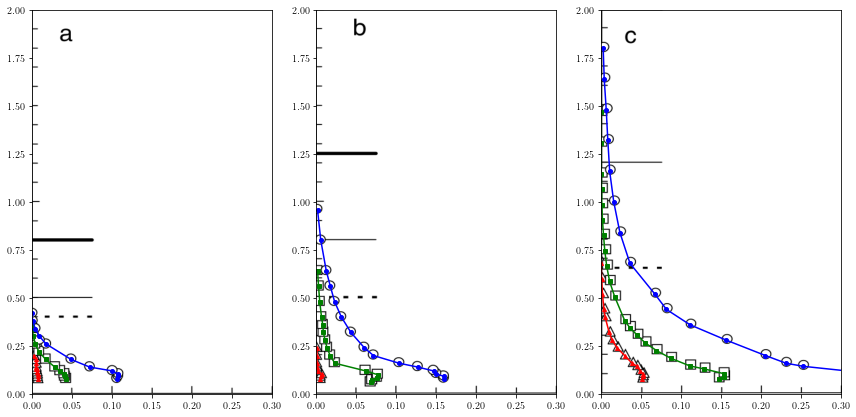

In [28]:
img_a = plt.imread("void_fraction_section_a.png")
img_b = plt.imread("void_fraction_section_b.png")
img_c = plt.imread("void_fraction_section_c.png")

imgs = [0, img_a, img_b, img_c]

tab_G = [ [0 for i in range(3)] for i in range(4)] # tab_G[debit air][position]

for pos in range(3):
    for deb in range(1, 4) :
        tab_G[deb][pos] = pd.read_csv(f"{noms_debit[deb]}{noms_positions[pos]}_G.txt", sep = '\t')
        tab_G[deb][pos].columns = ['y/h', 'alp_p', 'UG/Ulmax', 'alp', 'UG']

fig = plt.figure(figsize = (12,8))
    
for pos in range(3): #localisation
    plt.subplot(int(f"13{pos+1}"))
    plt.xlim(0, 0.3)
    for deb in range(1, 4):
        plt.imshow(imgs[pos+1], extent=[0, 0.3, 0, 2], aspect=0.24)

        plt.plot(tab_G[deb][pos]['alp'], tab_G[deb][pos]['y/h'], labels_debit[deb], markersize = 4)

    
plt.tight_layout()

plt.savefig("Void fraction.png")

## Velocity distribution

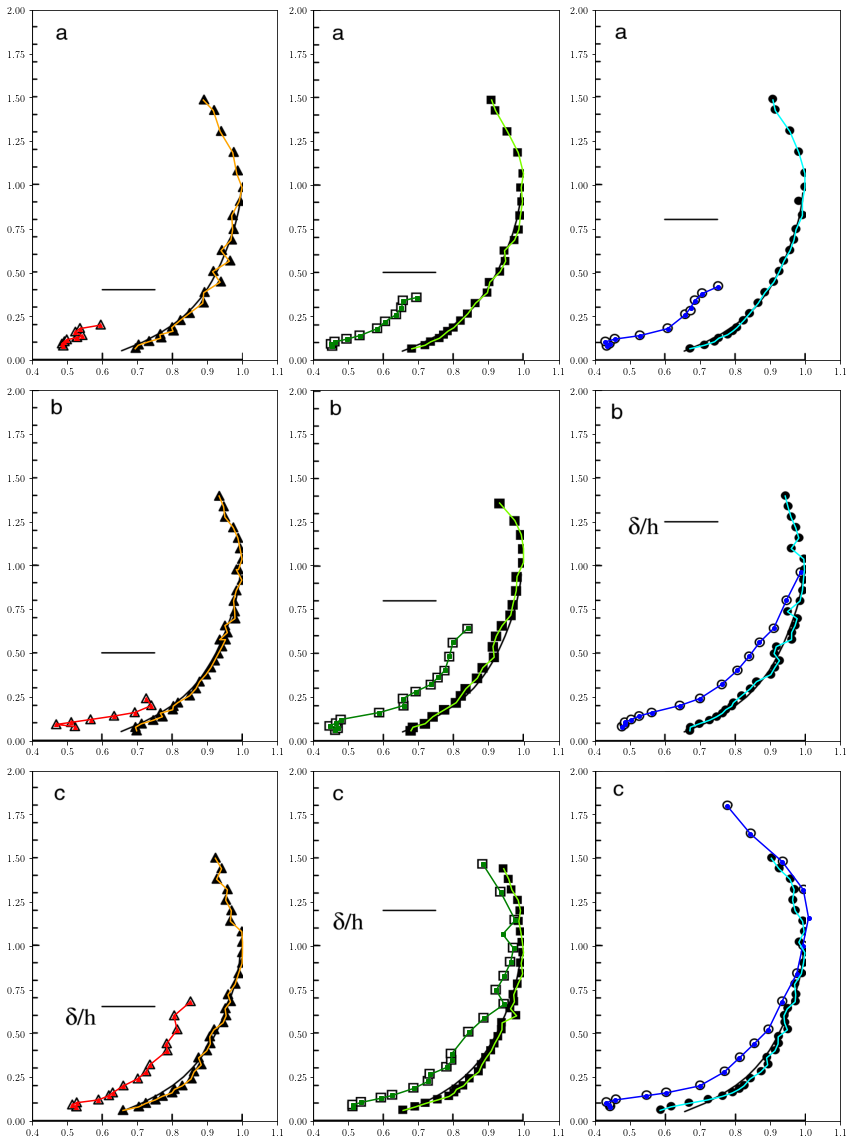

In [34]:
img_2a = plt.imread("speed_2mms_section_a.png")
img_2b = plt.imread("speed_2mms_section_b.png")
img_2c = plt.imread("speed_2mms_section_c.png")
img_5a = plt.imread("speed_5mms_section_a.png")
img_5b = plt.imread("speed_5mms_section_b.png")
img_5c = plt.imread("speed_5mms_section_c.png")
img_10a= plt.imread("speed_10mms_section_a.png")
img_10b= plt.imread("speed_10mms_section_b.png")
img_10c= plt.imread("speed_10mms_section_c.png")

imgs = [0, [img_2a , img_2b , img_2c] , [img_5a , img_5b , img_5c] , [img_10a , img_10b , img_10c] ] # [Debit][position]

fig = plt.figure(figsize = (12,16))

color_debit_liq = ["b", "orange", "chartreuse", "cyan"]

for pos in range(3): #localisation
    for deb in range(1, 4):
        plt.subplot(int(f"33{3*pos+deb}"))
        plt.imshow(imgs[deb][pos], extent=[0.4, 1, 0, 2], aspect=0.5)

        plt.plot(tab_G[deb][pos]['UG/Ulmax'], tab_G[deb][pos]['y/h'], labels_debit[deb], markersize = 4)
        plt.plot(tab_L_simple[deb][pos]['UL/Ulmax'], tab_L_simple[deb][pos]['y/h'], color = color_debit_liq[deb])
        plt.xlim(.4, 1.1)
        
plt.tight_layout()


plt.savefig("Velocity distribution.png")